# <center><u>Online Retail</u></center>

# <b>Introduction</b>

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# <b>Attribute Information</b>

<b>InvoiceNo</b>: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

<b>StockCode</b>: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

<b>Description</b>: Product (item) name. Nominal.

<b>Quantity</b>: The quantities of each product (item) per transaction. Numeric.

<b>InvoiceDate</b>: Invice Date and time. Numeric, the day and time when each transaction was generated.

<b>UnitPrice</b>: Unit price. Numeric, Product price per unit in sterling.

<b>CustomerID</b>: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

<b>Country</b>: Country name. Nominal, the name of the country where each customer resides.



# Sample Dataset

Import Pandas library in order to convert the file xlsx into csv format.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data_xls = pd.read_excel('online_retail.xlsx', 0, index_col=None)
data_xls.to_csv('online_retail_ori.csv', encoding='utf-8')

<b>Read CSV file</b>

In [94]:
df = pd.read_csv('online_retail_ori.csv', encoding='utf-8')

View the dimension of the data and sample of the data

In [95]:
df.shape

(541909, 9)

In [96]:
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


There 541909 rows with 9 columns(variables).

The datatype for each variables.

In [97]:
df.dtypes

Unnamed: 0       int64
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

# Data Cleaning & Transformation

View the the variables using describe function

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
Unnamed: 0     541909 non-null int64
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


Variable <i>Description</i> and <i>CustomerID</i> have missing values. <i>CustomerID</i> have more than 100000 missing values, and maybe consider it to be removed.

In [99]:
print (df['Country'].unique())

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


It's interesting since there are many country involve in this transaction. Of course it is, because this is internation transaction though. Maybe we can view the distribution of customer of each country?

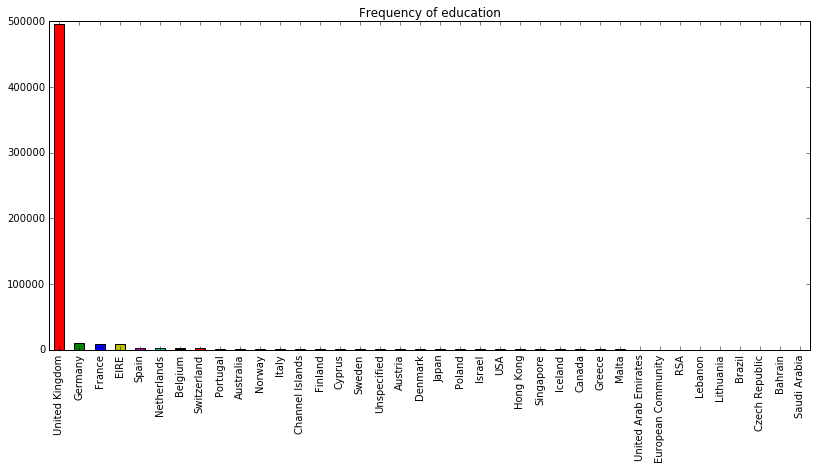

In [100]:
plt.rc('figure', figsize=(10, 5))
fizsize_with_subplots = (30, 20)
fig = plt.figure(figsize=fizsize_with_subplots)
fig_dims = (3,2)
colors = 'rgbymck'

# EDUCATION
plt.subplot2grid(fig_dims, (0, 0))
df['Country'].value_counts().plot(kind='bar',title='Frequency of education', color=colors)

Variable <i>Country</i> also need consider to be removed since the number of customers not balance for each country and mostly from UK.

In [101]:
df_uk = df[df['Country'] == 'United Kingdom'].copy()
df_uk = df_uk[pd.notnull(df_uk['Description'])]
df_uk = df_uk[pd.notnull(df_uk['CustomerID'])]
df_uk = df_uk.drop(df_uk.columns[[0]],axis=1)
#http://stackoverflow.com/questions/32675861/copy-all-values-in-a-column-to-a-new-column-in-a-pandas-dataframe

In [102]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
graph_prod = df_uk.groupby(['Description']).sum()
graph_prod = graph_prod.sort_values('Quantity',ascending=False).head(10)
graph_prod['Quantity'].plot(kind='bar',color=colors)
graph_prod['Quantity']

# http://queirozf.com/entries/pandas-dataframe-by-example
# http://chrisalbon.com/python/pandas_sorting_rows_dataframe.html
#http://stackoverflow.com/questions/29219055/plot-top-10-verse-all-other-values

Above is the graph of 10 products bought by the customer from UK. Product that the most bought is <i>WORLD WAR 2 GLIDERS ASSTD DESIGNS</i>.